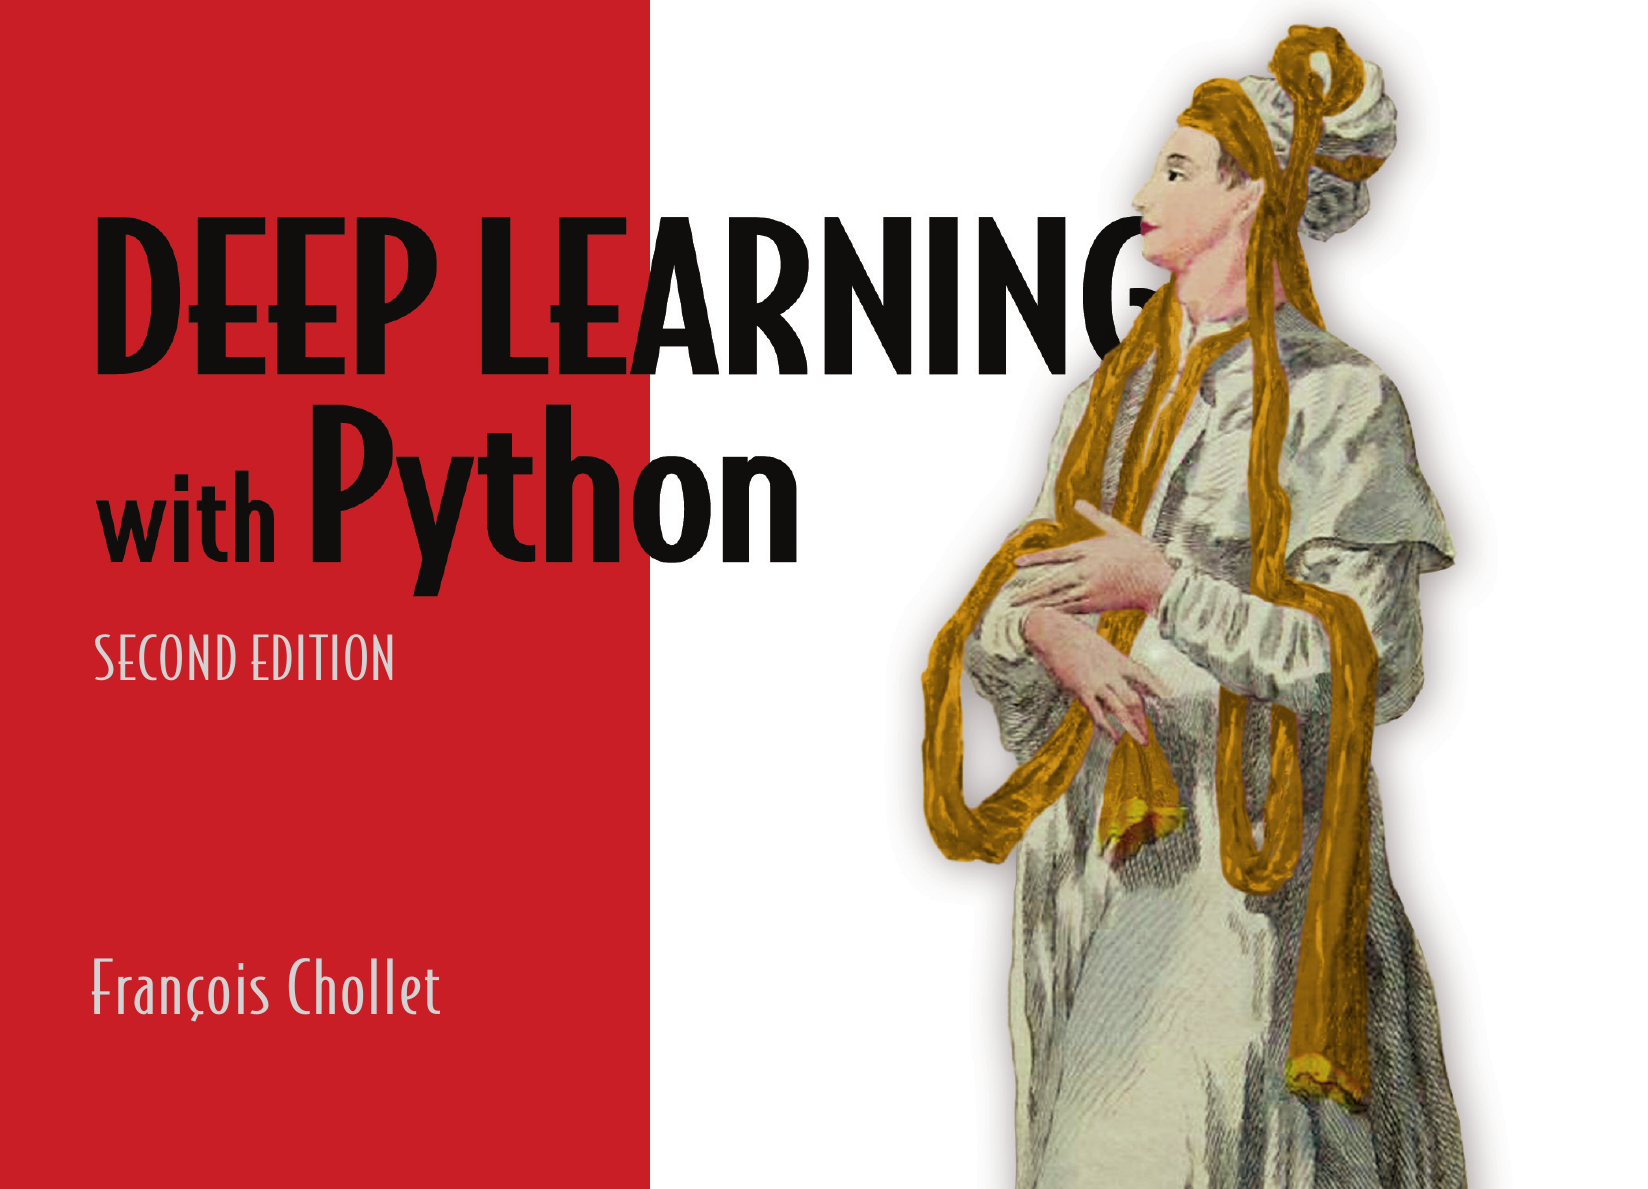

# The mathematical building blocks of neural networks

This Lecture Covers
- A first example of a neural network.
- Tensors and tensor operations.
- How neural networks learn via backpropagation and gradient descent.

Understanding deep learning requires familiarity with many simple mathematical concepts:
- tensors, tensor operations, differentiation, gradient descent, and so on.

## A first look at a neural network

**Loading the MNIST dataset in Pytorch**

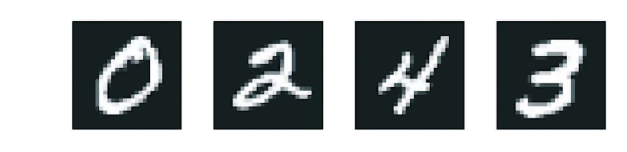

Pytorch has two abstractions to store data: <strong> Datasets </strong> and <strong> Dataloaders </strong>. Datasets is the object that stores the data, can be downloaded directly or from a numpy array. Then you feed this Dataset to a Dataloader, which will optimize the job of providing the data for you. Additionally, you can use transforms to preprocess the data.

In [1]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_images = datasets.MNIST(root="data", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_images, batch_size=64, shuffle=True)

# Download and load the test data
test_images = datasets.MNIST(root="data", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_images, batch_size=64, shuffle=False)

We can use the dataloader iterator to inspect the database. The dataloader will yield batches of data, according to the batch_size parameter. As we defined it to be 64, we have 64 images, that are 28x28 and have a single color channel.

In [2]:
train_data_iter = iter(trainloader)
train_images, train_labels = next(train_data_iter)

train_images.shape

torch.Size([64, 1, 28, 28])

In [18]:
len(train_images)

60000

In [11]:
len(test_images)

10000

**The network architecture**

In [9]:
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 512),
    nn.ReLU(),
    nn.Linear(512, 10),
)

The core building block of neural networks is the layer.
- You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form.
- Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand.
- Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation.
- A deep learning model is like a sieve for data processing, made of a succession of increasingly refined data filters—the layers.

**Getting ready to train**

To make the model ready for training, we need to pick two more things:

1. An optimizer—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
2. A loss function—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

In [10]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters())

**Training the model**

In [11]:
EPOCHS = 5

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # Train the network with the batch of data
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # print statistics
    print(f'Epoch {epoch+1}/{EPOCHS}\nloss: {running_loss / 1000:.3f}')
    running_loss = 0.0

print('Finished Training')


Epoch 1/5
loss: 3.827
Epoch 2/5
loss: 0.331
Epoch 3/5
loss: 0.290
Epoch 4/5
loss: 0.272
Epoch 5/5
loss: 0.250
Finished Training


**Using the model to make predictions**

In [12]:
model.eval()

test_data_iter = iter(testloader)
test_digits, test_labels = next(test_data_iter)

with torch.no_grad():
    predictions = model(test_digits)

predictions[0]

tensor([-2.4062e+01, -6.5023e-02,  7.6977e+00,  1.7341e+00, -2.1547e+01,
        -5.1283e+00, -7.8498e+01,  1.0520e+01, -6.8583e+00, -5.3062e+00])

In [13]:
argmax = predictions[0].argmax()
argmax

tensor(7)

In [7]:
predictions[0][int(argmax)]

tensor(1.)

In [8]:
test_labels[0]

tensor(7)

**Evaluating the model on new data**

In [11]:
correct = 0

for i, p in enumerate(predictions):
    if p.argmax() == test_labels[i]:
        correct += 1

print(f"Accuracy on test: {correct / len(predictions) * 100}%")

Accuracy on test: 93.75%


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [22]:
import numpy as np

train_images_numpy = train_images.data.numpy()

x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

### Vectors (rank-1 tensors)

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

- Don’t confuse a 5D vector with a 5D tensor! A 5D vector has only one axis and has five dimensions along its axis, whereas a 5D tensor has five axes (and may have any number of dimensions along each axis)
-  Dimensionality can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times.
-  In the latter case, it’s technically more correct to talk about a tensor of rank 5 (the rank of a tensor being the number of axes), but the ambiguous notation 5D tensor is common regardless.

### Matrices (rank-2 tensors)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

- Number of axes (rank).
- Shape.
- Data type.

In [15]:
train_images_numpy.ndim

3

In [16]:
train_images_numpy.shape

(60000, 28, 28)

In [17]:
train_images_numpy.dtype

dtype('uint8')

**Displaying the fifth digit**

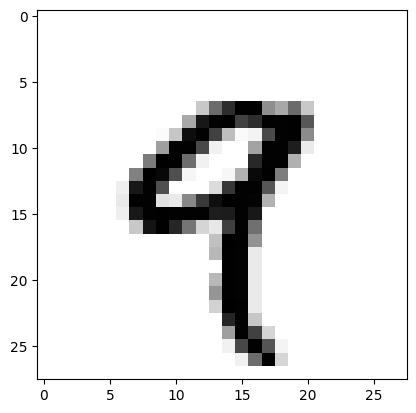

In [20]:
import matplotlib.pyplot as plt

digit = train_images_numpy[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in NumPy

In [23]:
my_slice = train_images_numpy[10:100]
my_slice.shape

(90, 28, 28)

In [24]:
my_slice = train_images_numpy[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [25]:
my_slice = train_images_numpy[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [26]:
my_slice = train_images_numpy[:, 14:, 14:]

In [27]:
my_slice = train_images_numpy[:, 7:-7, 7:-7]

### The notion of data batches

- In general, the first axis (axis 0, because indexing starts at 0) in all data tensors you'll come across in deep learning will be the samples axis (sometimes called the samples dimension).

In [28]:
batch = train_images_numpy[:128]

In [29]:
batch = train_images_numpy[128:256]

In [30]:
n = 3
batch = train_images_numpy[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

Let’s take a look at two examples:
1. An actuarial dataset of people, where we consider each person’s age, gender, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a rank-2 tensor of shape (100000, 3).
1. A dataset of text documents, where we represent each document by the counts of how many times each word appears in it (out of a dictionary of 20,000 common words). Each document can be  encoded as a vector of 20,000 values (one count per word in the dictionary), and thus an entire dataset of 500 documents can be stored in a tensor of shape (500, 20000).

### Timeseries data or sequence data

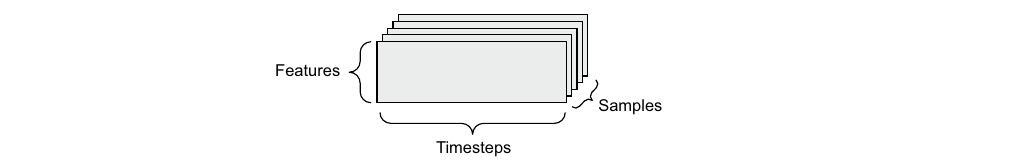

- A dataset of stock prices. Every minute, we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute. Thus, every minute is encoded as a 3D vector, an entire day of trading is encoded as a matrix of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a rank-3 tensor of shape (250, 390, 3). Here, each sample would be one day’s worth of data.
- A dataset of tweets, where we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128 (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a rank-2 tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape (1000000, 280, 128).

### Image data

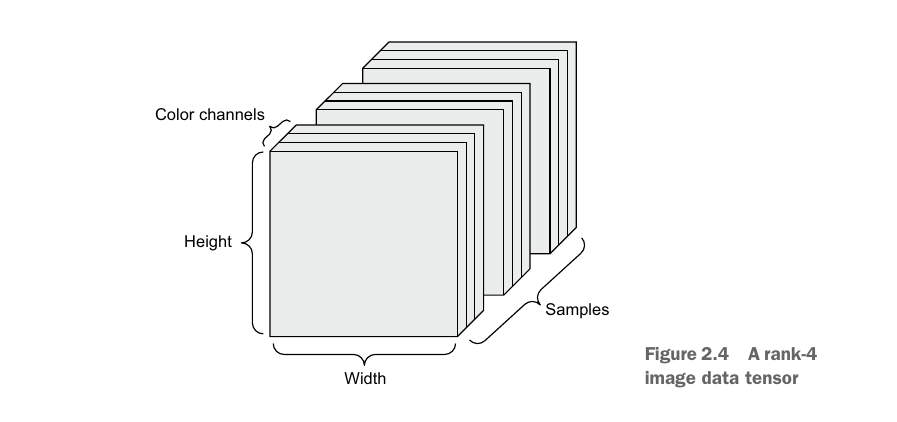

- Images typically have three dimensions: height, width, and color depth. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in rank-2 tensors, by convention image tensors are always rank-3, with a one-dimensional color channel for grayscale images. A batch of 128 grayscale images of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, 1), and a batch of 128 color images could be stored in a tensor of shape (128, 256, 256, 3).

### Video data

- Video data is one of the few types of real-world data for which you’ll need rank-5 tensors. A video can be understood as a sequence of frames, each frame being a color image. Because each frame can be stored in a rank-3 tensor (height, width, color_depth), a sequence of frames can be stored in a rank-4 tensor (frames, height, width, color_depth), and thus a batch of different videos can be stored in a rank-5 tensor of shape (samples, frames, height, width, color_depth).

- For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3).

- For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a tensor of shape (4, 240, 144, 256, 3). That’s a total of 106,168,320 values!

- If the dtype of the tensor was float32, each value would be stored in 32 bits, so the tensor would represent 405 MB. Heavy! Videos you encounter in real life are much lighter, because they aren’t stored in float32, and they’re typically compressed by a large factor (such as in the MPEG format).

## The gears of neural networks: tensor operations

Any computer program can be ultimately reduced to a small set of binary
operations on binary inputs:
- AND, OR, NOR, and so on.

All transformations learned by deep neural networks can be reduced to a handful of tensor operations (or tensor functions) applied to **tensors of numeric data**.

In our initial example, we built our model by stacking Linear layers on top of each other. A Pytorch layer instance looks like this:

```python
nn.Linear(784, 512),
```

This layer takes as input a matrix and returns another matrix—a new representation for the input tensor. Specifically, the function is as follows (where $W$ is a matrix and $b$ is a vector, both attributes of the layer):

```python
output = dot(input, W) + b
```

Let's unpack this. We have three tensor operations here:
- A dot product (dot) between the input tensor and a tensor named W.
- An addition (+) between the resulting matrix and a vector b.

- NOTE Although this section deals entirely with linear algebra expressions, you won’t find any mathematical notation here. I’ve found that **mathematical concepts can be more readily mastered by programmers with no mathematical background if they’re expressed as short Python snippets** instead of mathematical equations. So we’ll use NumPy and TensorFlow code throughout.

### Element-wise operations

The relu operation and addition are element-wise operations: operations that are applied independently to each entry in the tensors being considered.

In [37]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [38]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [39]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.00 s


In [40]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.29 s


### Broadcasting

- Our earlier naive implementation of naive_add only supports the addition of rank-2 tensors with identical shapes.
- But in the Dense layer introduced earlier, we added a rank-2 tensor with a vector.
- What happens with addition when the shapes of the two tensors being added differ?

When possible, and if there’s no ambiguity, the smaller tensor will be broadcast to match the shape of the larger tensor. Broadcasting consists of two steps:
1. Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
1. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [41]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [42]:
y = np.expand_dims(y, axis=0)

In [43]:
Y = np.concatenate([y] * 32, axis=0)

In [44]:
X + Y

array([[0.45688274, 1.2976444 , 1.17244212, 0.92902892, 0.36498609,
        0.94761488, 0.53092674, 1.56817483, 0.69529159, 0.6983731 ],
       [0.6584289 , 0.91330205, 1.66498054, 1.17164928, 0.93269653,
        1.09058456, 0.43050749, 1.64081453, 0.28619186, 1.12098638],
       [0.03199   , 1.11204805, 1.75424144, 1.54930705, 0.81482009,
        0.67922171, 1.04274698, 1.37328523, 0.3741366 , 1.05220681],
       [0.77522913, 1.2660432 , 1.51784279, 0.94806984, 0.30001193,
        0.93935029, 0.45188549, 0.93187286, 0.92927985, 0.57233687],
       [0.83395087, 1.54916187, 1.77473875, 1.63055948, 0.82726371,
        0.51964504, 0.22093201, 1.64042135, 0.4201843 , 0.70116716],
       [0.42109062, 0.71635416, 1.60403884, 1.11295386, 0.38621867,
        1.15377979, 0.29814228, 1.30217021, 0.93123763, 1.26961996],
       [0.26445467, 1.07217963, 1.29262661, 1.51483786, 0.94161013,
        0.89940456, 0.69844372, 1.20898777, 0.95024132, 0.43976119],
       [0.01902459, 0.94575707, 1.5279017

- The repetition operation is entirely virtual: it happens at the algorithmic level rather than at the memory level.

In [45]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [46]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

- The tensor product, or dot product (not to be confused with an element-wise product, the * operator), is one of the most common, most useful tensor operations.
- In NumPy, a tensor product is done using the np.dot function (because the mathematical notation for tensor product is usually a dot):

In [47]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
print(z)

10.19322593670586


In mathematical notation, you’d note the operation with a dot ($\bullet$):

$z = x \bullet y$

Mathematically, what does the dot operation do? Let’s start with the dot product of
two vectors, $x$ and $y$. It’s computed as follows:

In [48]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

You can also take the dot product between a matrix $x$ and a vector $y$, which returns a vector where the coefficients are the dot products between $y$ and the rows of $x$. You implement it as follows:

In [49]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [50]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

Note that as soon as one of the two tensors has an ndim greater than 1, dot is no longer symmetric, which is to say that dot(x, y) isn’t the same as dot(y, x).

Of course, a dot product generalizes to tensors with an arbitrary number of axes. The most common applications may be the dot product between two matrices. You can take the dot product of two matrices x and y (dot(x, y)) if and only if x.shape[1] == y.shape[0].

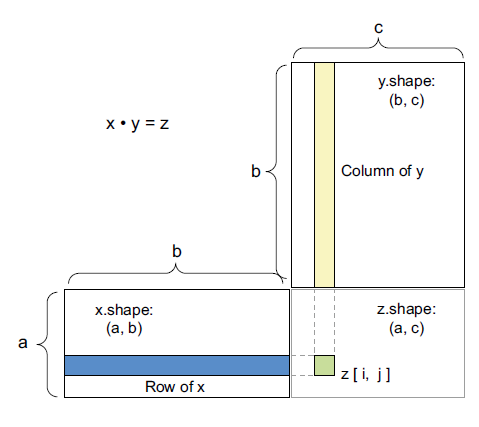

In [51]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

More generally, you can take the dot product between higher-dimensional tensors, following the same rules for shape compatibility as outlined earlier for the 2D case:

$(a, b, c, d) • (d,) \rightarrow (a, b, c)$

$(a, b, c, d) • (d, e) \rightarrow (a, b, c, e)$

### Tensor reshaping

A third type of tensor operation that’s essential to understand is tensor reshaping. Although it wasn't used in the Dense layers in our first neural network example, we used it when we preprocessed the digits data before feeding it into our model:

In [31]:
train_images_numpy = train_images_numpy.reshape((60000, 28 * 28))

In [32]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [54]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [55]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

Because the contents of the tensors manipulated by tensor operations can be interpreted as coordinates of points in some geometric space, all tensor operations have a geometric interpretation. For instance, let’s consider addition. We’ll start with the following vector:

$A = [0.5, 1]$

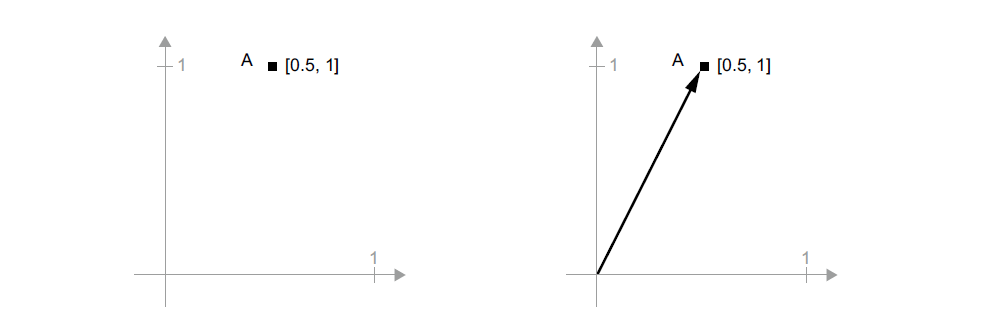

Let’s consider a new point, $B = [1, 0.25]$, which we’ll add to the previous one.

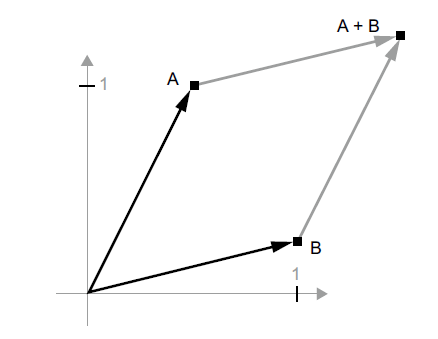

Translation:

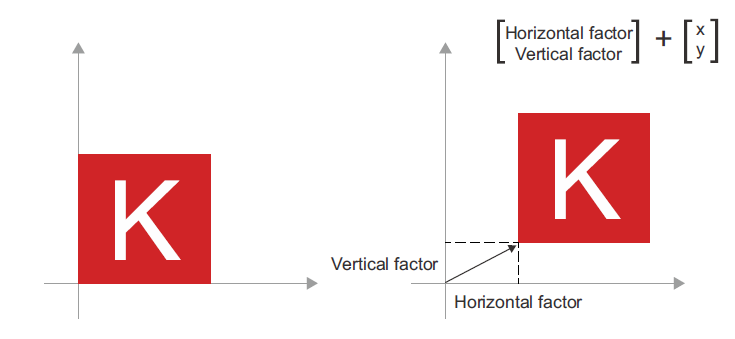

Rotation: A counterclockwise rotation of a 2D vector by an angle $\theta$:

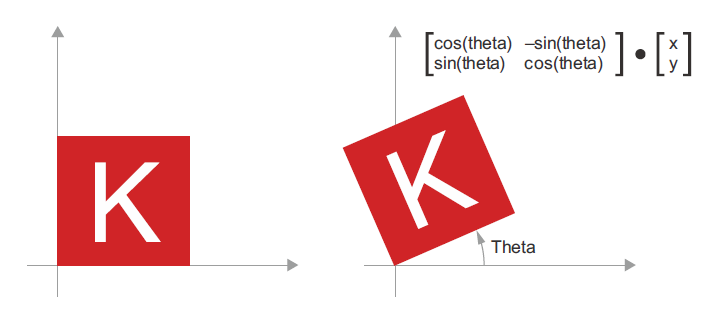

Scaling:

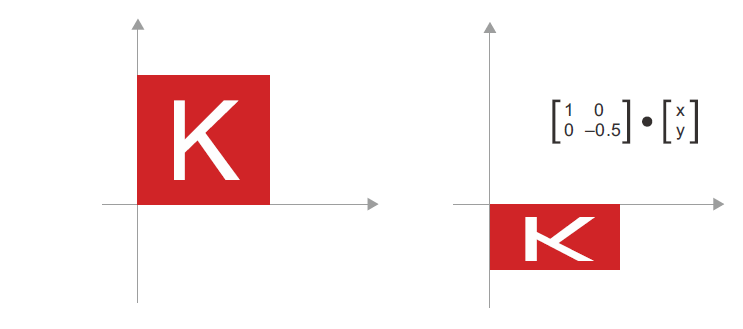

Linear transform:

A dot product with an arbitrary matrix implements a  linear transform. Note that scaling and rotation, listed previously, are by  definition linear transforms.

Affine transform: An affine transform is the combination of a linear transform (achieved via a dot product with some matrix) and a translation (achieved via a vector addition). Ie., $y = W • x + b$ computation implemented by the Dense layer! A Dense layer without an activation function is an affine layer.
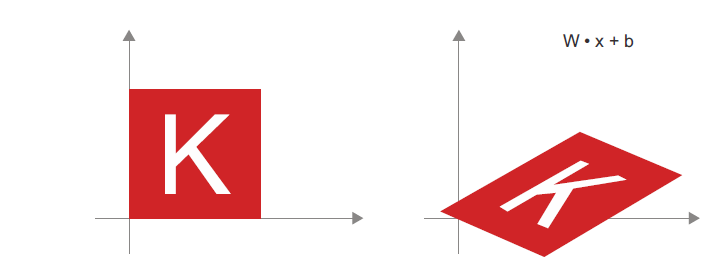

Dense layer with relu activation:

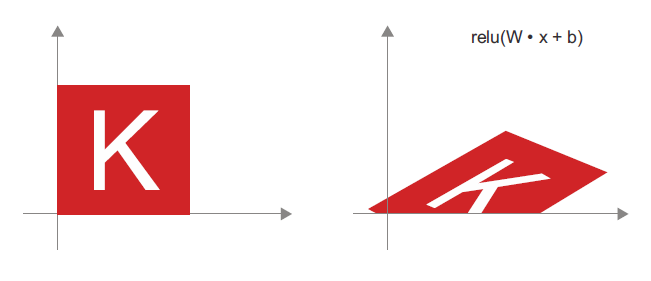

### A geometric interpretation of deep learning

- A neural network as a very complex geometric transformation in a high-dimensional space, implemented via a series of simple steps.

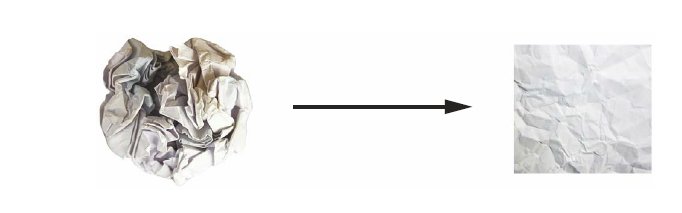

- Uncrumpling paper balls is what ML is about: finding neat representations for complex, highly folded data manifolds in high-dimensional spaces (a manifold is a continuous surface, like our crumpled sheet of paper).

- At this point, you should have a pretty good intuition as to why deep learning excels at this: it takes the approach of incrementally decomposing a complicated geometric transformation into a long chain of elementary ones, which is pretty much the strategy a human would follow to uncrumple a paper ball.

- Each layer in a deep network applies a transformation that disentangles the data a little, and a deep stack of layers makes tractable an extremely complicated disentanglement process.

## The engine of neural networks: gradient-based optimization

Each layer output (in our example):

```
output = relu(dot(input, W) + b)
```

In this expression:
- W and b are tensors that are attributes of the layer.
- They’re called the weights or trainable parameters of the layer (the kernel and bias attributes, respectively).

- Initially, these weight matrices are filled with small random values (a step called random initialization).
- Of course, there’s no reason to expect that relu(dot(input, W) + b), when W and b are random, will yield any useful representations.
- Next step is to gradually adjust these weights, based on a feedback signal.
- This happens within what’s called a training loop, which works as follows.
- Repeat these steps in a loop, until the loss seems sufficiently low:

1. Draw a batch of training samples, x, and corresponding targets, y_true.
1. Run the model on x (a step called the forward pass) to obtain predictions, y_pred.
1. Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.
1. Update all weights of the model in a way that slightly reduces the loss on this batch.

- You’ll eventually end up with a model that has a very low loss on its training data: a low mismatch between predictions, y_pred, and expected targets, y_true. The model has "learned" to map its inputs to correct targets.

- Step 1 sounds easy enough.

- The difficult part is step 4: updating the model's weights.

- One naive solution would be to freeze all weights in the model except the one scalar coefficient being considered, and try different values for this coefficient.

- But such an approach would be horribly inefficient.
    - two forward passes (which are expensive) for every individual coefficient (of which there are many, usually thousands and sometimes up to millions).
    - Thankfully, there’s a much better approach: **gradient descent**.

- Gradient descent is the optimization technique that powers modern neural networks.

### What's a derivative?

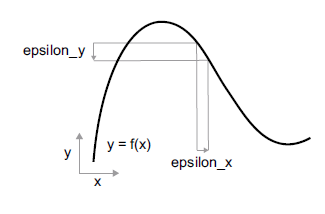

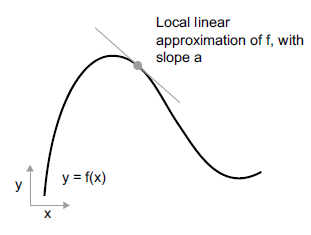

For every differentiable function $f(x)$ (differentiable means "can be derived": for example, smooth, continuous functions can be derived), there exists a derivative function $f'(x)$, that maps values of $x$ to the slope of the local linear approximation of $f$ in those points.

For instance:
- The derivative of $\cos(x)$ is $-\sin(x)$.
- The derivative of $f(x) = a * x$ is $f'(x) = a$, and so on.

### Derivative of a tensor operation: the gradient

- The function we were just looking at turned a scalar value x into another scalar value y: you could plot it as a curve in a 2D plane.

- Now imagine a function that turns a tuple of scalars (x, y) into a scalar value z: that would be a vector operation. You could plot it as a 2D surface in a 3D space (indexed by coordinates x, y, z). Likewise, you can imagine functions that take matrices as inputs, functions that take rank-3 tensors as inputs, etc.

- The concept of derivation can be applied to any such function, as long as the surfaces they describe are continuous and smooth. The derivative of a tensor operation (or tensor function) is called a **gradient**.

- Gradients are just the generalization of the concept of derivatives to functions that take tensors as inputs.

- Remember how, for a scalar function, the derivative represents the local slope of the curve of the function? In the same way, the gradient of a tensor function represents the curvature of the multidimensional surface described by the function. It characterizes how the output of the function varies when its input parameters vary.

Let's look at an example grounded in machine learning. Consider:
- An input vector, x (a sample in a dataset).
- A matrix, W (the weights of a model).
- A target, y_true (what the model should learn to associate to x).
- A loss function, loss (meant to measure the gap between the model’s current predictions and y_true).

### Stochastic gradient descent

- It's theoretically possible to find the minimum of a differentiable function analytically (x for which f'(x) = 0).
- But this is intractable for real neural networks, where the number of parameters is never less than a few thousand.

- Instead, we can use the four-step algorithm outlined at the beginning of this section: modify the parameters little by little based on the current loss value for a random batch of data.

1. Draw a batch of training samples, x, and corresponding targets, y_true.
1. Run the model on x to obtain predictions, y_pred (this is called the forward pass).
1. Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.
1. Compute the gradient of the loss with regard to the model’s parameters (this is called the backward pass).
1. Move the parameters a little in the opposite direction from the gradient -- for example, W -= learning_rate * gradient -- thus reducing the loss on the batch a bit. The learning rate (learning_rate here) would be a scalar factor modulating the "speed" of the gradient descent process.

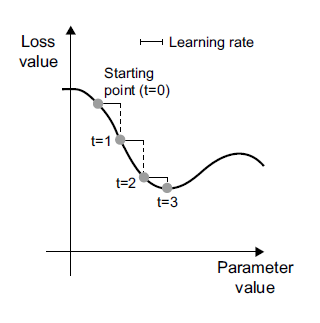

As you can see, intuitively:
- It’s important to pick a reasonable value for the learning_rate factor. If it’s too small, the descent down the curve will take many iterations, and it could get stuck in a local minimum.
- If learning_rate is too large, your updates may end up taking you to completely random locations on the curve.

- Note that a variant of the mini-batch SGD algorithm would be to draw a single sample and target at each iteration, rather than drawing a batch of data. This would be true SGD (as opposed to mini-batch SGD).
- Alternatively, going to the opposite extreme, you could run every step on all data available, which is called batch gradient descent. Each update would then be more accurate, but far more expensive.
- The efficient compromise between these two extremes is to use mini-batches of reasonable size.

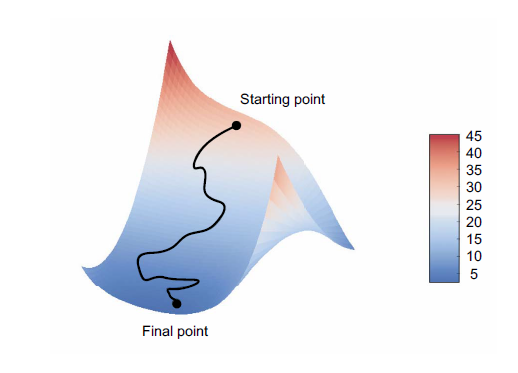

- There exist multiple variants of SGD that differ by taking into account previous weight updates when computing the next weight update, rather than just looking at the current value of the gradients.
- There is, for instance, SGD with momentum, as well as Adagrad, RMSprop, and several others. Such variants are known as optimization methods or optimizers.

Momentum addresses two issues with SGD:
1. Convergence speed.
1. Local minima.

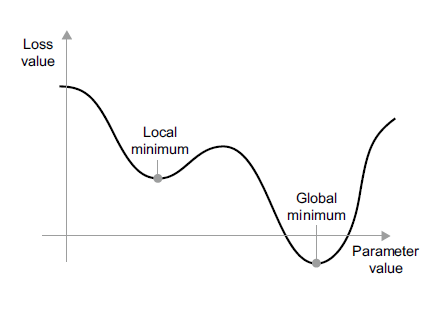

- A useful mental image here is to think of the optimization process as a small ball rolling down the loss curve. If it has enough momentum, the ball won’t get stuck in a ravine and will end up at the global minimum. Momentum is implemented by moving the ball at each step based not only on the current slope value (current acceleration) but also on the current velocity (resulting from past acceleration).

In [56]:
# past_velocity = 0.
# momentum = 0.1

# while loss > 0.01:
#     w, loss, gradient = get_current_parameters()
#     velocity = past_velocity * momentum - learning_rate * gradient
#     w = w + momentum * velocity - learning_rate * gradient
#     past_velocity = velocity
#     update_parameter(w)

### Chaining derivatives: The Backpropagation algorithm

How can we get the gradient of the loss with regard to the weights?

That's where the **Backpropagation algorithm** comes in.

#### The chain rule

- Backpropagation is a way to use the derivatives of simple operations (such as addition, relu, or tensor product) to easily compute the gradient of arbitrarily complex combinations of these atomic operations.

- Crucially, a neural network consists of many tensor operations chained together, each of which has a simple, known derivative.

- For instance, the model we used previously can be expressed as a function parameterized by the variables $W_1, b_1, W_2$, and $b_2$ (belonging to the first and second Dense layers respectively), involving the atomic operations dot, relu, softmax, and +, as well as our loss function loss, which are all easily differentiable:

```
loss_value = loss(y_true, softmax(dot(relu(dot(inputs, W1) + b1), W2) + b2))
```

- Calculus tells us that such a chain of functions can be derived using the following identity, called the chain rule. Consider two functions

$f$ and $g$,

as well as the composed function $fg$ such that

fg(x) == f(g(x)):

#### Automatic differentiation with computation graphs

- A useful way to think about backpropagation is in terms of computation graphs

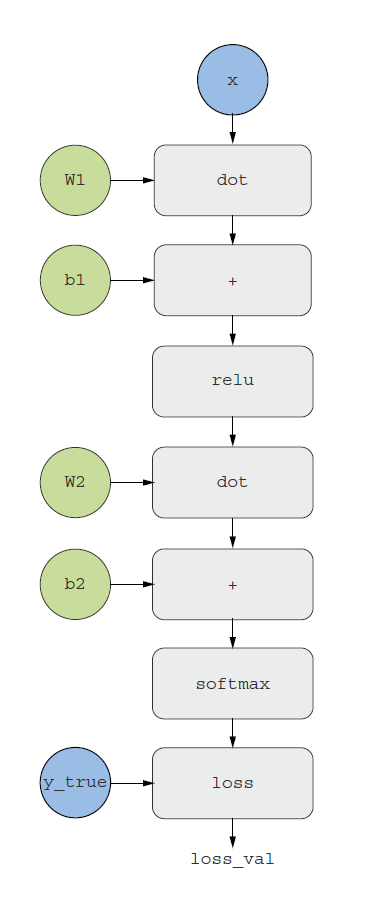

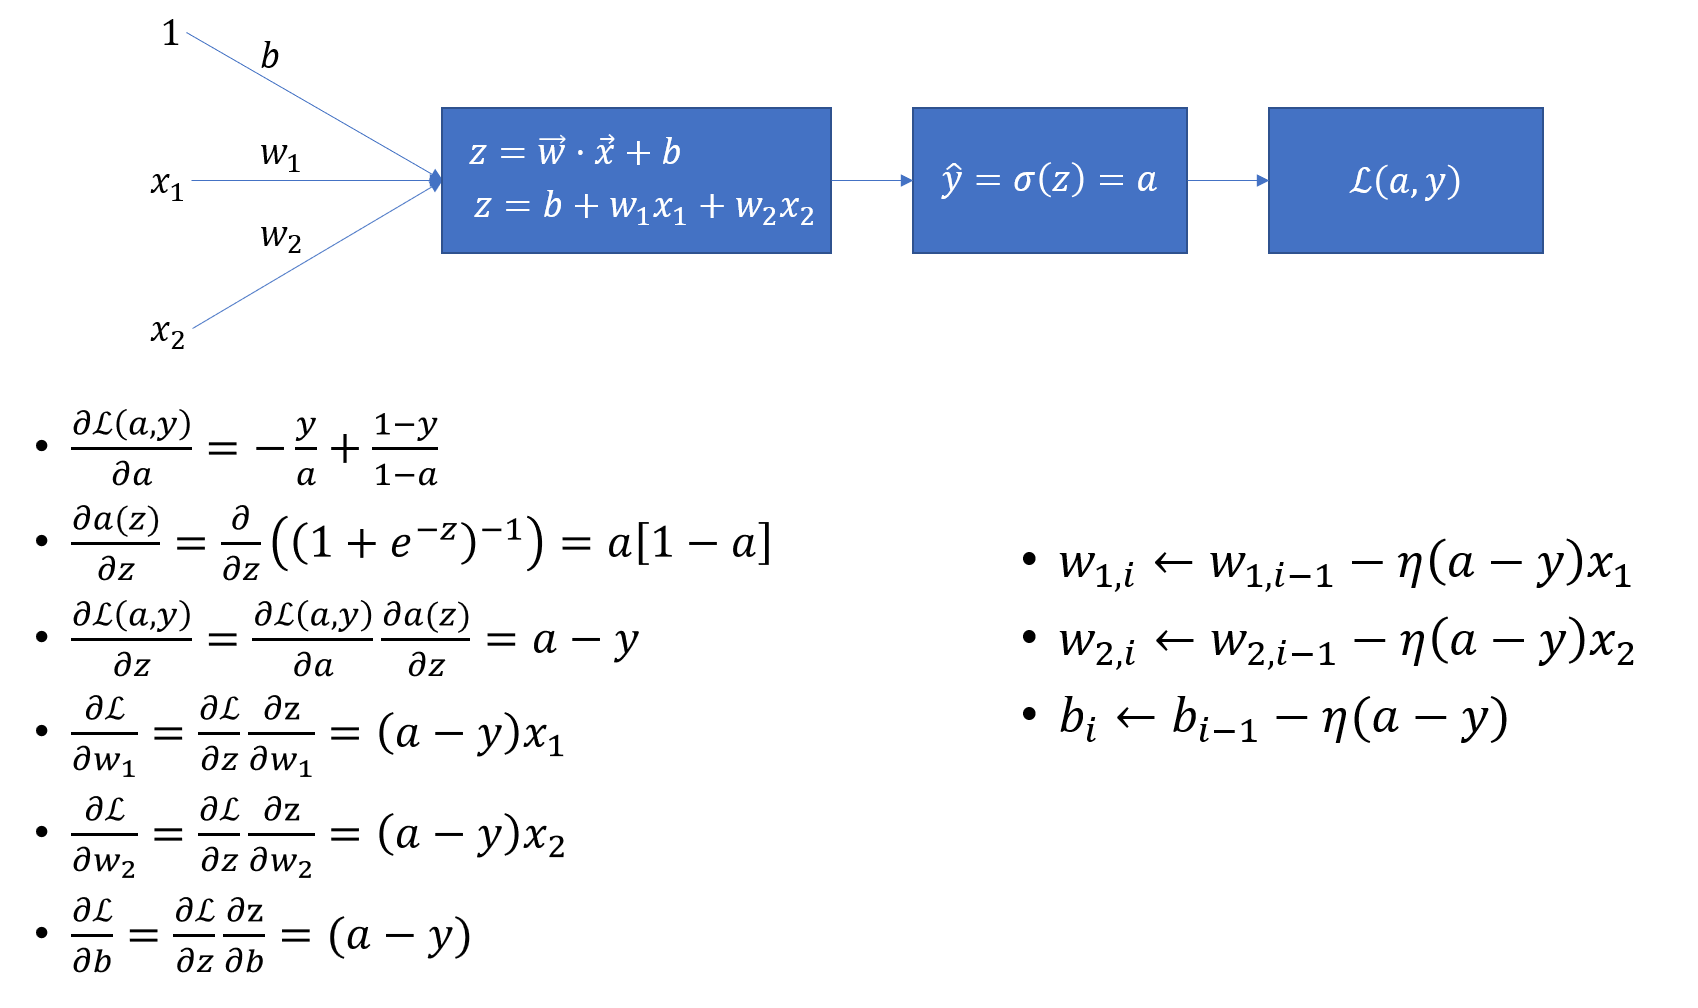

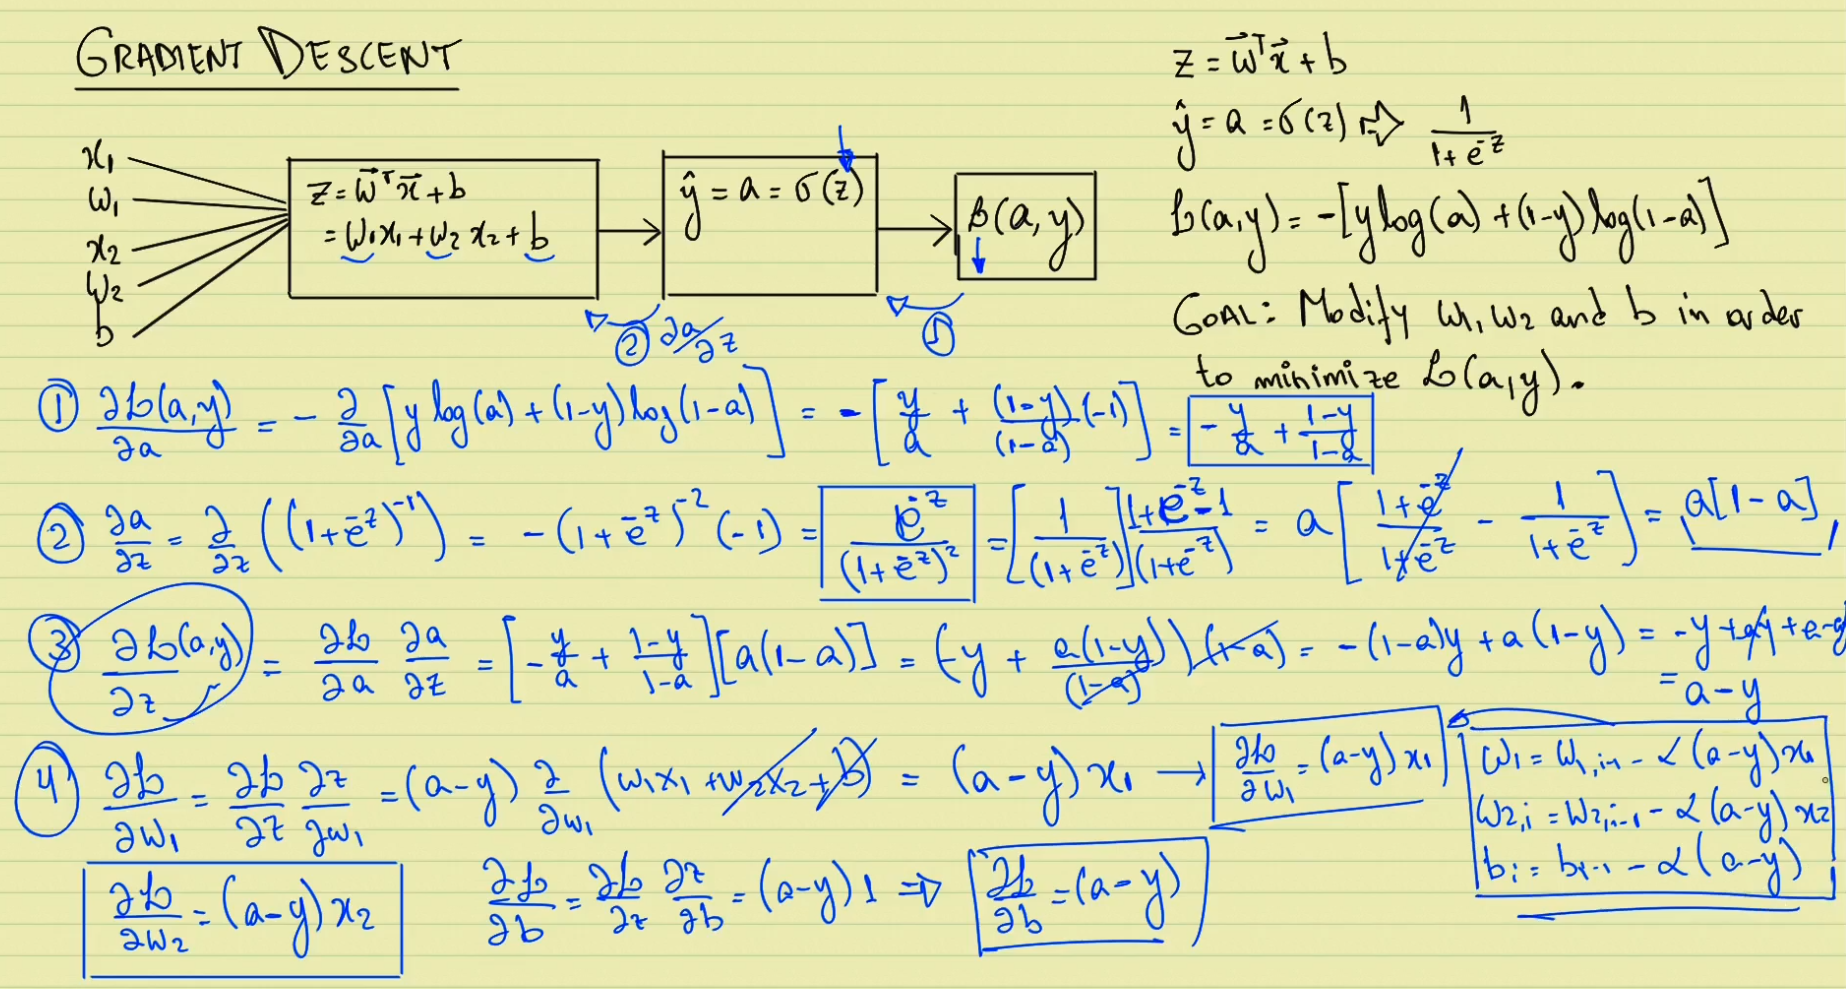

#### Pytorch's Autograd

- Autograd is the API through which you can leverage powerful automatic differentiation capabilities to train neural networks.
- It’s a Python scope that will “record” the tensor operations that run inside it, in the form of a computation graph (sometimes called a "tape").
- This graph can then be used to retrieve the gradient of any output with respect to any variable or set of tensors.
- A Tensor needs to have required_grads=True to be able to use Autograd. This has computational costs, so you normally enable it only when training models.

In [12]:
import torch

x = torch.tensor(0.0, requires_grad=True)

y = 2 * x + 3

grad_of_y_wrt_x = torch.autograd.grad(y, x)[0]

grad_of_y_wrt_x

tensor(2.)

In [13]:
import torch

x = torch.rand((2, 2), requires_grad=True)

y = 2 * x + 3

gradient_shape = torch.ones_like(y)
grad_of_y_wrt_x = torch.autograd.grad(y, x, grad_outputs=gradient_shape)

grad_of_y_wrt_x

(tensor([[2., 2.],
         [2., 2.]]),)

In [14]:
import torch

W = torch.rand((2, 2), requires_grad=True)
b = torch.zeros((2,), requires_grad=True)
x = torch.rand((2, 2))

y = torch.matmul(x, W) + b
grad_of_y_wrt_W_and_b = torch.autograd.grad(y, [W, b], grad_outputs=x)

grad_of_y_wrt_W_and_b

(tensor([[0.6815, 0.4377],
         [0.4377, 0.6546]]),
 tensor([1.0878, 1.0124]))

### Reimplementing our first example from scratch in TensorFlow

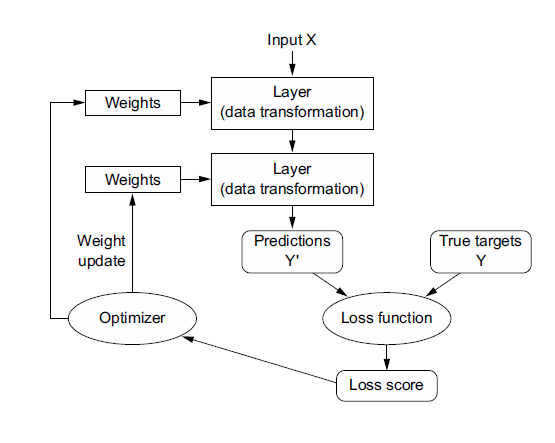

In [24]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_images = datasets.MNIST(root="data", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_images, batch_size=64, shuffle=True)

# Download and load the test data
test_images = datasets.MNIST(root="data", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_images, batch_size=64, shuffle=False)

In [34]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 512),
    nn.ReLU(),
    nn.Linear(512, 10),
    #nn.Softmax(dim=1)
)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters())

In [67]:
EPOCHS = 5

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # Train the network with the batch of data
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # print statistics
    print(f'Epoch {epoch+1}/{EPOCHS}\nloss: {running_loss / 1000:.3f}')
    running_loss = 0.0

print('Finished Training')


Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2550 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1022 - accuracy: 0.9695
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9887


Now you understand what happens when you train the model:

- the model will start to iterate on the training data in batches from the dataloader, 5 times over (each iteration over all the training data is called an epoch).
    - For each batch, the model will compute the gradient of the loss with regard to the weights (using the Backpropagation algorithm, which derives from the chain rule in calculus) and move the weights in the direction that will reduce the value of the loss for this batch.
- After these 5 epochs, the model will have performed several gradient updates, and the loss of the model will be sufficiently low that the model will be capable of classifying handwritten digits with high accuracy.

### Reimplementing our first example from scratch in TensorFlow

#### A simple Linear layer

In [19]:
import torch
import torch.nn as nn

class NaiveLinear(nn.Module):
    
    def __init__(self, input_size, output_size, activation):
        super(NaiveLinear, self).__init__()
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = torch.rand(w_shape) * 0.1
        self.W = nn.Parameter(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = torch.zeros(b_shape)
        self.b = nn.Parameter(b_initial_value)

    def forward(self, inputs):
        return self.activation(torch.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [17]:
class NaiveSequential(nn.Module):
    
    def __init__(self, layers):
        super(NaiveSequential, self).__init__()
        self.layers = nn.ModuleList(layers)

    def forward(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            if hasattr(layer, 'weights'):
                weights += layer.weights
        return weights

In [20]:
model = NaiveSequential([
    NaiveLinear(input_size=28 * 28, output_size=512, activation=nn.ReLU()),
    NaiveLinear(input_size=512, output_size=10, activation=nn.Softmax(dim=1))
])
assert len(model.weights) == 4

#### A batch generator

In [28]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [30]:
def one_training_step(model, images_batch, labels_batch, optimizer):

    optimizer.zero_grad()
    predictions = model(images_batch)
    per_sample_losses = loss_function(predictions, labels_batch)
    average_loss = torch.mean(per_sample_losses)
    average_loss.backward()
    optimizer.step()
    return average_loss.item()

### The full training loop

In [32]:
def train(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch, optimizer)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [35]:
all_training_images = train_images.data.float()
all_training_labels = train_images.targets

train(model, all_training_images, all_training_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 29.53
loss at batch 100: 1.56
loss at batch 200: 1.61
loss at batch 300: 1.29
loss at batch 400: 1.53
Epoch 1
loss at batch 0: 1.20
loss at batch 100: 1.16
loss at batch 200: 1.43
loss at batch 300: 1.71
loss at batch 400: 1.47
Epoch 2
loss at batch 0: 1.40
loss at batch 100: 1.59
loss at batch 200: 1.22
loss at batch 300: 1.36
loss at batch 400: 1.46
Epoch 3
loss at batch 0: 1.08
loss at batch 100: 1.19
loss at batch 200: 1.22
loss at batch 300: 1.13
loss at batch 400: 1.87
Epoch 4
loss at batch 0: 1.00
loss at batch 100: 1.46
loss at batch 200: 3.08
loss at batch 300: 2.12
loss at batch 400: 2.23
Epoch 5
loss at batch 0: 1.00
loss at batch 100: 1.80
loss at batch 200: 0.81
loss at batch 300: 1.05
loss at batch 400: 2.17
Epoch 6
loss at batch 0: 0.90
loss at batch 100: 0.99
loss at batch 200: 0.94
loss at batch 300: 0.97
loss at batch 400: 1.60
Epoch 7
loss at batch 0: 0.95
loss at batch 100: 1.39
loss at batch 200: 1.82
loss at batch 300: 0.92
loss at batch 4

### Evaluating the model

In [40]:
predictions = model(all_training_images)

correct = 0

for i, p in enumerate(predictions):
    if p.argmax() == all_training_labels[i]:
        correct += 1

print(f"Accuracy on test: {correct / len(predictions) * 100}%")

Accuracy on test: 61.92333333333333%


## Summary

- Tensors form the foundation of modern machine learning systems. They come in various flavors of dtype, rank, and shape.
- You can manipulate numerical tensors via tensor operations (such as addition, tensor product, or element-wise multiplication), which can be interpreted as encoding geometric transformations. - In general, everything in deep learning is amenable to a geometric interpretation.
- Deep learning models consist of chains of simple tensor operations, parameterized by weights, which are themselves tensors. The weights of a model are where its "knowledge" is stored.
- Learning means finding a set of values for the model’s weights that minimizes a loss function for a given set of training data samples and their corresponding targets.

- Learning happens by drawing random batches of data samples and their targets, and computing the gradient of the model parameters with respect to the loss on the batch. The model parameters are then moved a bit (the magnitude of the move is defined by the learning rate) in the opposite direction from the gradient. This is called _mini-batch stochastic gradient descent_.
- The entire learning process is made possible by the fact that all tensor operations in neural networks are differentiable, and thus it’s possible to apply the chain rule of derivation to find the gradient function mapping the current parameters and current batch of data to a gradient value. This is called backpropagation.
- Two key concepts you’ll see frequently in future chapters are loss and optimizers. These are the two things you need to define before you begin feeding data into a model.
    - The loss is the quantity you’ll attempt to minimize during training, so it should represent a measure of success for the task you’re trying to solve.
    - The optimizer specifies the exact way in which the gradient of the loss will be used to update parameters: for instance, it could be the RMSProp optimizer, SGD with momentum, and so on.